In [1]:
from alpha_vantage.timeseries import TimeSeries
import pandas as pd

API_KEY = 'CMSZIWYWAHTR01BR'
ts = TimeSeries(key=API_KEY, output_format='pandas')
data, meta_data = ts.get_intraday(symbol='TSLA',interval='1min', outputsize='full')
data.rename(columns={'1. open': 'open', '2. high':'high', '3. low':'low', '4. close':'close', '5. volume':'volume'}, inplace=True)

In [90]:
meta_data

{'1. Information': 'Intraday (1min) open, high, low, close prices and volume',
 '2. Symbol': 'TSLA',
 '3. Last Refreshed': '2020-10-22 20:00:00',
 '4. Interval': '1min',
 '5. Output Size': 'Full size',
 '6. Time Zone': 'US/Eastern'}

In [93]:
data.head(5)

,open,high,low,close,volume
date,,,,,
2020-10-22 20:00:00,426.30,426.58,426.30,426.49,5786.0
2020-10-22 19:59:00,426.69,426.69,426.25,426.50,6459.0
2020-10-22 19:58:00,426.39,426.67,426.37,426.67,3597.0
2020-10-22 19:57:00,426.40,426.50,426.40,426.50,4659.0
2020-10-22 19:56:00,426.30,426.40,426.30,426.40,1062.0


In [94]:
data.describe()

,open,high,low,close,volume
count,8186.000000,8186.000000,8186.000000,8186.000000,8186.000000
mean,440.075412,440.310327,439.825464,440.070842,43259.001222
std,10.469139,10.464931,10.483045,10.472242,61468.216942
min,419.901300,420.200000,419.050100,419.925000,100.000000
25%,431.861975,432.170000,431.600000,431.870150,1670.250000
50%,441.309750,441.520000,441.025000,441.300000,15344.500000
75%,447.253750,447.500000,447.047875,447.250000,66668.000000
max,465.590000,465.900000,465.100000,465.650000,869572.000000


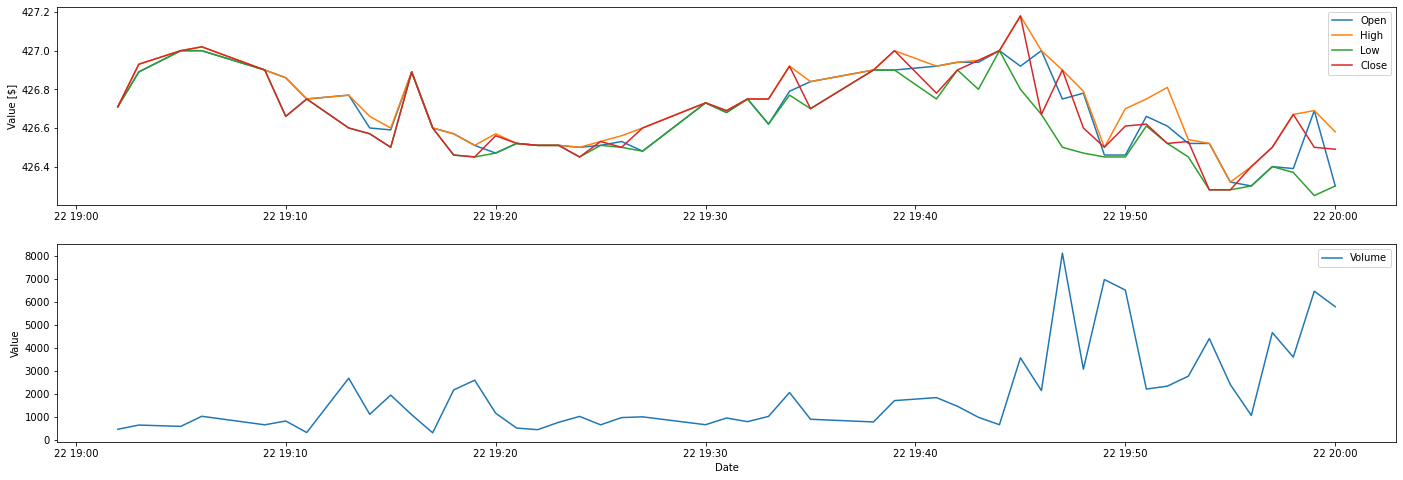

In [96]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(24,8))
plt.subplot(2, 1, 1)
plt.plot(data.iloc[:50, :-1])
plt.legend(['Open', 'High', 'Low', 'Close'])
plt.ylabel('Value [$]')
plt.subplot(2, 1, 2)
plt.plot(data.iloc[:50, -1])
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend(['Volume'])
plt.show()

In [91]:
# save to csv
data.to_csv('input_data.csv')

# read from csv
data = pd.read_csv('input_data.csv', index_col=0)
data.index = pd.to_datetime(data.index)